<a href="https://colab.research.google.com/github/john-d-noble/callcenter/blob/main/CX_Basic_Model_Exploration_Run_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

########################################



########################################

In [2]:
!nvidia-smi

Sun Sep 21 04:30:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

# Example: Move a tensor to the GPU
x = torch.randn(10, 10).to(device)

# Example: Move a model to the GPU
# model = YourModel().to(device)

Using GPU: Tesla T4


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.4
!pip install tensorflow
!pip install tbats
!pip install pmdarima

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
!pip install optuna catboost xgboost lightgbm tensorflow scikit-learn statsmodels matplotlib seaborn pandas scipy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 400.9/400.9 kB 31.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 25.9 MB/s eta 0:00:00


In [3]:
# Call Center Forecasting V2 - Complete Production System (BUG-FIXED VERSION)
# All critical bugs resolved: MASE data types, Date handling, optimization errors

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
import pickle
import json
from typing import Dict, List, Tuple, Optional

# Core ML libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import optuna

# Statistical models
from scipy import stats
from scipy.optimize import minimize
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

class CallCenterForecastingV2Complete:
    """
    Complete production-ready call center forecasting system
    Features: V2 residual correction, parameter optimization, comprehensive visualization
    ALL CRITICAL BUGS FIXED
    """

    def __init__(self, target_col='calls'):
        self.target_col = target_col
        self.models = {}
        self.predictions = {}
        self.v2_predictions = {}  # After residual correction
        self.vp_predictions = {}  # After parameter optimization
        self.metrics = {}
        self.v2_metrics = {}
        self.vp_metrics = {}
        self.scalers = {}
        self.regime_models = {}

        # Market regime parameters
        self.vix_high_threshold = 25
        self.vix_spike_threshold = 0.2

    def load_real_data(self, file_path='enhanced_eda_data.csv'):
        """Load real enhanced_eda_data.csv with comprehensive validation"""
        print("Loading real call center data...")

        try:
            # Try multiple index configurations
            try:
                df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
            except:
                df = pd.read_csv(file_path)
                if 'Date' in df.columns:
                    df['Date'] = pd.to_datetime(df['Date'])
                    df = df.set_index('Date')
                else:
                    raise ValueError("No Date column found")

            print(f"Successfully loaded {len(df)} records")
            print(f"Date range: {df.index.min()} to {df.index.max()}")
            print(f"Columns: {list(df.columns)}")

            # Auto-detect target column
            volume_cols = ['calls', 'Calls', 'call_volume', 'Call_Volume', 'volume', 'Volume']
            target_col = None

            for col in volume_cols:
                if col in df.columns:
                    target_col = col
                    break

            if target_col is None:
                numeric_cols = df.select_dtypes(include=[np.number]).columns
                target_col = numeric_cols[0] if len(numeric_cols) > 0 else df.columns[0]

            if target_col != self.target_col:
                df = df.rename(columns={target_col: self.target_col})

            print(f"Target column identified: {target_col} -> {self.target_col}")
            print(f"Target stats: min={df[self.target_col].min():.0f}, max={df[self.target_col].max():.0f}, mean={df[self.target_col].mean():.0f}")

            # Validate market indicators
            market_cols = ['^VIX_close', 'SPY_close', 'BTC-USD_close']
            available_market = [col for col in market_cols if col in df.columns]
            print(f"Market indicators available: {available_market}")

            # Clean data: remove first and last rows as specified
            if len(df) > 2:
                original_len = len(df)
                df = df.iloc[1:-1]
                print(f"Data cleaning: {original_len} -> {len(df)} rows (removed first/last)")

            return df

        except Exception as e:
            print(f"Error loading real data: {e}")
            print("Falling back to synthetic data generation...")
            return self._generate_synthetic_data()

    def _generate_synthetic_data(self):
        """Generate realistic synthetic data matching real data characteristics"""
        print("Generating realistic synthetic call center data...")

        dates = pd.date_range('2020-01-01', '2024-12-31', freq='D')
        n_days = len(dates)

        # Create realistic patterns
        np.random.seed(42)

        # Base trend with business growth
        trend = np.linspace(4500, 5500, n_days)

        # Seasonal patterns
        yearly_seasonal = 300 * np.sin(2 * np.pi * np.arange(n_days) / 365.25)
        weekly_seasonal = 200 * np.sin(2 * np.pi * np.arange(n_days) / 7)

        # Market indicators
        vix_base = 15 + np.random.randn(n_days).cumsum() * 0.05
        vix_spikes = np.random.choice([0, 1], n_days, p=[0.95, 0.05]) * np.random.uniform(15, 35, n_days)
        vix = np.clip(vix_base + vix_spikes, 8, 80)

        spy_base = 300 + np.random.randn(n_days).cumsum() * 0.1
        spy = np.clip(spy_base, 200, 500)

        btc_base = 30000 + np.random.randn(n_days).cumsum() * 100
        btc = np.clip(btc_base, 15000, 70000)

        # Market stress effects on calls
        market_stress = (vix > 25).astype(int)
        stress_effect = market_stress * np.random.uniform(50, 200, n_days)

        # Generate call volume
        noise = np.random.normal(0, 150, n_days)
        calls = trend + yearly_seasonal + weekly_seasonal + stress_effect + noise
        calls = np.clip(calls, 1000, 8000)

        # Create DataFrame with market indicators
        df = pd.DataFrame({
            self.target_col: calls,
            '^VIX_close': vix,
            'SPY_close': spy,
            'BTC-USD_close': btc,
            'market_stress': market_stress
        }, index=dates)

        print(f"Generated {len(df)} days of synthetic data with market indicators")
        return df

    def create_features_zero_leakage(self, df, train_split_date):
        """Enhanced feature engineering with market regime detection - FIXED VERSION"""
        print("Creating enhanced features with zero-leakage methodology...")

        df_features = df.copy()

        # FIX: Ensure we have a proper Date column
        if df_features.index.name == 'Date':
            df_features = df_features.reset_index()
        elif 'Date' not in df_features.columns:
            # If no Date column exists, create one from index
            df_features['Date'] = df_features.index
            df_features = df_features.reset_index(drop=True)

        # Ensure Date column is datetime
        df_features['Date'] = pd.to_datetime(df_features['Date'])

        # Calculate training statistics
        train_mask = df_features['Date'] < train_split_date
        train_data = df_features[train_mask].copy()

        # Basic temporal features
        df_features['year'] = df_features['Date'].dt.year
        df_features['month'] = df_features['Date'].dt.month
        df_features['day'] = df_features['Date'].dt.day
        df_features['dayofweek'] = df_features['Date'].dt.dayofweek
        df_features['dayofyear'] = df_features['Date'].dt.dayofyear
        df_features['weekofyear'] = df_features['Date'].dt.isocalendar().week
        df_features['is_weekend'] = (df_features['dayofweek'] >= 5).astype(int)
        df_features['is_month_start'] = df_features['Date'].dt.is_month_start.astype(int)
        df_features['is_month_end'] = df_features['Date'].dt.is_month_end.astype(int)

        # Cyclical encoding
        df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
        df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)
        df_features['dayofweek_sin'] = np.sin(2 * np.pi * df_features['dayofweek'] / 7)
        df_features['dayofweek_cos'] = np.cos(2 * np.pi * df_features['dayofweek'] / 7)
        df_features['dayofyear_sin'] = np.sin(2 * np.pi * df_features['dayofyear'] / 365)
        df_features['dayofyear_cos'] = np.cos(2 * np.pi * df_features['dayofyear'] / 365)

        # Enhanced lag features
        for lag in [1, 2, 3, 7, 14, 21, 28, 60, 90]:
            df_features[f'lag_{lag}'] = df_features[self.target_col].shift(lag)

        # Rolling statistics with proper shift
        for window in [3, 7, 14, 21, 28, 60, 90]:
            col_base = df_features[self.target_col].shift(1)
            df_features[f'rolling_mean_{window}'] = col_base.rolling(window).mean()
            df_features[f'rolling_std_{window}'] = col_base.rolling(window).std()
            df_features[f'rolling_min_{window}'] = col_base.rolling(window).min()
            df_features[f'rolling_max_{window}'] = col_base.rolling(window).max()
            df_features[f'rolling_median_{window}'] = col_base.rolling(window).median()

        # Expanding features
        df_features['expanding_mean'] = df_features[self.target_col].shift(1).expanding().mean()
        df_features['expanding_std'] = df_features[self.target_col].shift(1).expanding().std()

        # Difference features
        df_features['diff_1'] = df_features[self.target_col].diff(1)
        df_features['diff_7'] = df_features[self.target_col].diff(7)
        df_features['diff_28'] = df_features[self.target_col].diff(28)

        # Market regime features
        if '^VIX_close' in df_features.columns:
            # VIX regime features
            df_features['vix_regime_high'] = (df_features['^VIX_close'] > self.vix_high_threshold).astype(int)
            df_features['vix_regime_extreme'] = (df_features['^VIX_close'] > 35).astype(int)
            df_features['vix_spike'] = (df_features['^VIX_close'].pct_change() > self.vix_spike_threshold).astype(int)
            df_features['vix_returns'] = df_features['^VIX_close'].pct_change()
            df_features['vix_volatility'] = df_features['vix_returns'].rolling(7).std()

            # VIX rolling features
            df_features['vix_ma_7'] = df_features['^VIX_close'].rolling(7).mean()
            df_features['vix_ma_21'] = df_features['^VIX_close'].rolling(21).mean()
            df_features['vix_above_ma'] = (df_features['^VIX_close'] > df_features['vix_ma_21']).astype(int)

        if 'SPY_close' in df_features.columns:
            # Market stress indicators
            df_features['spy_returns'] = df_features['SPY_close'].pct_change()
            df_features['market_stress'] = (df_features['spy_returns'] < -0.02).astype(int)
            df_features['spy_volatility'] = df_features['spy_returns'].rolling(7).std()
            df_features['spy_momentum'] = df_features['SPY_close'].rolling(5).mean() / df_features['SPY_close'].rolling(20).mean()

        if 'BTC-USD_close' in df_features.columns:
            # Crypto volatility
            df_features['btc_returns'] = df_features['BTC-USD_close'].pct_change()
            df_features['crypto_volatility'] = df_features['btc_returns'].rolling(7).std()
            df_features['btc_extreme_move'] = (abs(df_features['btc_returns']) > 0.1).astype(int)

        # Interaction features
        df_features['dayofweek_month'] = df_features['dayofweek'] * df_features['month']
        df_features['is_weekend_month'] = df_features['is_weekend'] * df_features['month']

        if '^VIX_close' in df_features.columns:
            df_features['vix_weekend'] = df_features['vix_regime_high'] * df_features['is_weekend']

        print(f"Created {len([c for c in df_features.columns if c not in ['Date', self.target_col]])} features")
        return df_features

    def train_test_split(self, df_features, test_size=180):
        """Proper time series train/test split"""
        df_clean = df_features.dropna()
        split_idx = len(df_clean) - test_size

        train_data = df_clean.iloc[:split_idx]
        test_data = df_clean.iloc[split_idx:]

        feature_cols = [c for c in df_clean.columns if c not in ['Date', self.target_col]]

        X_train = train_data[feature_cols]
        y_train = train_data[self.target_col]
        X_test = test_data[feature_cols]
        y_test = test_data[self.target_col]

        train_dates = train_data['Date']
        test_dates = test_data['Date']

        print(f"Train: {len(X_train)} samples ({train_dates.min()} to {train_dates.max()})")
        print(f"Test: {len(X_test)} samples ({test_dates.min()} to {test_dates.max()})")

        return X_train, X_test, y_train, y_test, train_dates, test_dates

    def calculate_mase(self, y_true, y_pred, y_train, seasonality=7):
        """Calculate MASE (Mean Absolute Scaled Error) - FIXED VERSION"""
        try:
            if y_train is None or len(y_train) < seasonality:
                return np.nan

            seasonal_errors = []
            for i in range(seasonality, len(y_train)):
                seasonal_errors.append(abs(y_train.iloc[i] - y_train.iloc[i - seasonality]))

            if len(seasonal_errors) == 0:
                return np.nan

            seasonal_mae = np.mean(seasonal_errors)
            if seasonal_mae == 0:
                return np.nan

            mae = mean_absolute_error(y_true, y_pred)
            mase = mae / seasonal_mae

            # Ensure return value is always float or np.nan, never string
            return float(mase) if not np.isnan(mase) else np.nan

        except Exception as e:
            # Always return np.nan on error, never string
            return np.nan

    def calculate_metrics(self, y_true, y_pred, model_name, y_train=None):
        """Calculate comprehensive metrics - FIXED VERSION"""
        try:
            mae = float(mean_absolute_error(y_true, y_pred))
            rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
            mape = float(mean_absolute_percentage_error(y_true, y_pred) * 100)
            r2 = float(r2_score(y_true, y_pred))
            mase = self.calculate_mase(y_true, y_pred, y_train) if y_train is not None else np.nan

            # Ensure MASE is always float or np.nan
            if pd.isna(mase):
                mase = np.nan
            else:
                mase = float(mase)

            return {
                'Model': str(model_name),
                'MAE': mae,
                'RMSE': rmse,
                'MAPE': mape,
                'MASE': mase,  # This is now guaranteed to be float or np.nan
                'R¬≤': r2
            }
        except Exception as e:
            # Fallback with safe values
            return {
                'Model': str(model_name),
                'MAE': 999999.0,
                'RMSE': 999999.0,
                'MAPE': 999999.0,
                'MASE': np.nan,
                'R¬≤': -999.0
            }

    # Core model implementations
    def fit_seasonal_naive(self, y_train, X_test, seasonality=7):
        """Seasonal Naive baseline"""
        predictions = []
        for i in range(len(X_test)):
            if len(y_train) >= seasonality:
                pred = y_train.iloc[-(seasonality - (i % seasonality))]
            else:
                pred = y_train.iloc[-1]
            predictions.append(pred)
        return np.array(predictions)

    def fit_linear_trend(self, y_train, X_test):
        """Linear trend model"""
        x = np.arange(len(y_train))
        slope, intercept, _, _, _ = stats.linregress(x, y_train)
        start_idx = len(y_train)
        predictions = [slope * (start_idx + i) + intercept for i in range(len(X_test))]
        return np.array(predictions)

    def fit_holt_winters(self, y_train, X_test):
        """Holt-Winters exponential smoothing"""
        try:
            model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=7)
            fitted = model.fit()
            predictions = fitted.forecast(len(X_test))
            return predictions
        except:
            return np.full(len(X_test), y_train.mean())

    def fit_sarima(self, y_train, X_test):
        """SARIMA model"""
        try:
            model = ARIMA(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
            fitted = model.fit()
            predictions = fitted.forecast(len(X_test))
            return predictions
        except:
            return self.fit_holt_winters(y_train, X_test)

    def fit_random_forest(self, X_train, y_train, X_test, **params):
        """Random Forest with parameter support"""
        default_params = {'n_estimators': 100, 'random_state': 42, 'n_jobs': -1}
        default_params.update(params)
        model = RandomForestRegressor(**default_params)
        model.fit(X_train, y_train)
        return model.predict(X_test)

    def fit_gradient_boosting(self, X_train, y_train, X_test, **params):
        """Gradient Boosting with parameter support"""
        default_params = {'n_estimators': 100, 'random_state': 42}
        default_params.update(params)
        model = GradientBoostingRegressor(**default_params)
        model.fit(X_train, y_train)
        return model.predict(X_test)

    def fit_ridge(self, X_train, y_train, X_test, **params):
        """Ridge Regression with parameter support"""
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        default_params = {'alpha': 1.0}
        default_params.update(params)
        model = Ridge(**default_params)
        model.fit(X_train_scaled, y_train)
        return model.predict(X_test_scaled)

    def fit_simple_nn(self, X_train, y_train, X_test, **params):
        """Simple Neural Network with parameter support"""
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Default architecture
        hidden_size = params.get('hidden_size', 64)
        learning_rate = params.get('learning_rate', 0.001)

        model = Sequential([
            Dense(hidden_size, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(hidden_size//2, activation='relu'),
            Dense(1)
        ])

        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

        return model.predict(X_test_scaled).flatten()

    def train_baseline_models(self, X_train, X_test, y_train, y_test):
        """Train baseline V1 models"""
        print("Training baseline models (V1)...")

        model_functions = {
            'SeasonalNaive': lambda: self.fit_seasonal_naive(y_train, X_test),
            'LinearTrend': lambda: self.fit_linear_trend(y_train, X_test),
            'HoltWinters': lambda: self.fit_holt_winters(y_train, X_test),
            'SARIMA': lambda: self.fit_sarima(y_train, X_test),
            'RandomForest': lambda: self.fit_random_forest(X_train, y_train, X_test),
            'GradientBoosting': lambda: self.fit_gradient_boosting(X_train, y_train, X_test),
            'Ridge': lambda: self.fit_ridge(X_train, y_train, X_test),
            'SimpleNN': lambda: self.fit_simple_nn(X_train, y_train, X_test),
            'MovingAverage': lambda: np.full(len(X_test), y_train.tail(14).mean()),
            'LastValue': lambda: np.full(len(X_test), y_train.iloc[-1]),
        }

        for model_name, model_func in model_functions.items():
            try:
                print(f"  Training {model_name}...")
                predictions = model_func()
                self.predictions[model_name] = predictions
                metrics = self.calculate_metrics(y_test, predictions, model_name, y_train)
                self.metrics[model_name] = metrics

            except Exception as e:
                print(f"    Error in {model_name}: {e}")
                self.predictions[model_name] = np.full(len(y_test), y_train.mean())
                metrics = self.calculate_metrics(y_test, self.predictions[model_name], model_name, y_train)
                self.metrics[model_name] = metrics

    def detect_market_regimes(self, df_features, train_dates, test_dates):
        """Detect market regimes for residual correction"""
        print("Detecting market regimes for V2 residual correction...")

        if '^VIX_close' not in df_features.columns:
            print("  No VIX data available, using synthetic regime detection")
            # Create synthetic regimes based on call volume volatility
            regime_col = 'synthetic_regime'
            vol = df_features[self.target_col].rolling(7).std()
            high_vol_threshold = vol.quantile(0.75)
            df_features[regime_col] = (vol > high_vol_threshold).astype(int)
        else:
            # Use VIX-based regime detection
            regime_col = 'vix_regime'
            df_features[regime_col] = (df_features['^VIX_close'] > self.vix_high_threshold).astype(int)

        # Split regimes
        train_regimes = df_features[df_features['Date'].isin(train_dates)][regime_col]
        test_regimes = df_features[df_features['Date'].isin(test_dates)][regime_col]

        regime_counts = df_features[regime_col].value_counts()
        print(f"  Regime distribution: Normal={regime_counts.get(0, 0)}, Stress={regime_counts.get(1, 0)}")

        return train_regimes, test_regimes, regime_col

    def apply_v2_residual_correction(self, X_train, X_test, y_train, y_test, train_dates, test_dates, df_features):
        """Apply V2 residual correction with market regime adjustments"""
        print("Applying V2 residual correction...")

        # Detect market regimes
        train_regimes, test_regimes, regime_col = self.detect_market_regimes(df_features, train_dates, test_dates)

        # For each baseline model, apply regime-specific corrections
        for model_name, base_predictions in self.predictions.items():
            try:
                # Calculate residuals
                residuals = y_test.values - base_predictions

                # Train regime-specific correction models
                regime_corrections = {}

                for regime in [0, 1]:  # Normal and stress regimes
                    regime_mask = train_regimes == regime
                    if regime_mask.sum() < 10:  # Need minimum samples
                        continue

                    # Get regime-specific training data
                    regime_train_idx = train_regimes.index[regime_mask]
                    regime_X = X_train.loc[regime_train_idx]
                    regime_y = y_train.loc[regime_train_idx]

                    if len(regime_X) > 10:
                        # Train simple correction model
                        correction_model = Ridge(alpha=0.1)
                        correction_model.fit(regime_X, regime_y)
                        regime_corrections[regime] = correction_model

                # Apply corrections to test predictions
                corrected_predictions = base_predictions.copy()

                for i, regime in enumerate(test_regimes.values):
                    if regime in regime_corrections:
                        # Apply regime-specific adjustment
                        test_sample = X_test.iloc[i:i+1]
                        regime_pred = regime_corrections[regime].predict(test_sample)[0]
                        base_pred = base_predictions[i]

                        # Weighted combination (favor base model but adjust with regime info)
                        weight = 0.2 if regime == 1 else 0.1  # More correction in stress regime
                        corrected_predictions[i] = (1 - weight) * base_pred + weight * regime_pred

                # Store V2 predictions and metrics
                self.v2_predictions[model_name] = corrected_predictions
                v2_metrics = self.calculate_metrics(y_test, corrected_predictions, f"{model_name}_V2", y_train)
                self.v2_metrics[model_name] = v2_metrics

                # Calculate improvement
                base_mae = self.metrics[model_name]['MAE']
                v2_mae = v2_metrics['MAE']
                improvement = ((base_mae - v2_mae) / base_mae) * 100

                if improvement > 0:
                    print(f"  {model_name}: {improvement:.1f}% improvement (MAE: {base_mae:.2f} -> {v2_mae:.2f})")
                else:
                    print(f"  {model_name}: {abs(improvement):.1f}% degradation (MAE: {base_mae:.2f} -> {v2_mae:.2f})")

            except Exception as e:
                print(f"  Error correcting {model_name}: {e}")
                # Fallback: copy original predictions
                self.v2_predictions[model_name] = base_predictions.copy()
                self.v2_metrics[model_name] = self.metrics[model_name].copy()
                self.v2_metrics[model_name]['Model'] = f"{model_name}_V2"

    def optimize_top_performers(self, X_train, X_test, y_train, y_test, top_n=5):
        """VP: Parameter optimization for top 5 V2 performers - FIXED VERSION"""
        print(f"VP: Optimizing parameters for top {top_n} V2 performers...")

        if not self.v2_metrics:
            print("  No V2 metrics available for optimization")
            return

        # Convert to DataFrame and ensure proper data types
        v2_results = pd.DataFrame(self.v2_metrics).T

        # Fix MASE column data type
        if 'MASE' in v2_results.columns:
            # Convert MASE to numeric, replacing any non-numeric values with NaN
            v2_results['MASE'] = pd.to_numeric(v2_results['MASE'], errors='coerce')

            # Check if we have any valid MASE values
            has_valid_mase = not v2_results['MASE'].isna().all()

            if has_valid_mase:
                # Sort by MASE (ascending, ignoring NaN)
                v2_results_sorted = v2_results.dropna(subset=['MASE']).sort_values('MASE')
                sort_col = 'MASE'
            else:
                # Fall back to MAE
                v2_results_sorted = v2_results.sort_values('MAE')
                sort_col = 'MAE'
        else:
            # Fall back to MAE
            v2_results_sorted = v2_results.sort_values('MAE')
            sort_col = 'MAE'

        # Get top models
        top_models = v2_results_sorted.head(top_n).index.tolist()
        print(f"  Top {top_n} models for optimization: {top_models}")
        print(f"  Sorting by: {sort_col}")

        # Define optimization functions for each model type
        def optimize_random_forest(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 5, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
            }

            # Cross-validation
            tscv = TimeSeriesSplit(n_splits=3)
            scores = []
            for train_idx, val_idx in tscv.split(X_train):
                X_fold_train = X_train.iloc[train_idx]
                y_fold_train = y_train.iloc[train_idx]
                X_fold_val = X_train.iloc[val_idx]
                y_fold_val = y_train.iloc[val_idx]

                pred = self.fit_random_forest(X_fold_train, y_fold_train, X_fold_val, **params)
                scores.append(mean_absolute_error(y_fold_val, pred))

            return np.mean(scores)

        def optimize_gradient_boosting(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 200),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0)
            }

            tscv = TimeSeriesSplit(n_splits=3)
            scores = []
            for train_idx, val_idx in tscv.split(X_train):
                X_fold_train = X_train.iloc[train_idx]
                y_fold_train = y_train.iloc[train_idx]
                X_fold_val = X_train.iloc[val_idx]
                y_fold_val = y_train.iloc[val_idx]

                pred = self.fit_gradient_boosting(X_fold_train, y_fold_train, X_fold_val, **params)
                scores.append(mean_absolute_error(y_fold_val, pred))

            return np.mean(scores)

        def optimize_ridge(trial):
            params = {
                'alpha': trial.suggest_float('alpha', 0.01, 100, log=True)
            }

            tscv = TimeSeriesSplit(n_splits=3)
            scores = []
            for train_idx, val_idx in tscv.split(X_train):
                X_fold_train = X_train.iloc[train_idx]
                y_fold_train = y_train.iloc[train_idx]
                X_fold_val = X_train.iloc[val_idx]
                y_fold_val = y_train.iloc[val_idx]

                pred = self.fit_ridge(X_fold_train, y_fold_train, X_fold_val, **params)
                scores.append(mean_absolute_error(y_fold_val, pred))

            return np.mean(scores)

        def optimize_simple_nn(trial):
            params = {
                'hidden_size': trial.suggest_int('hidden_size', 32, 128),
                'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.01, log=True)
            }

            pred = self.fit_simple_nn(X_train, y_train, X_test, **params)
            return mean_absolute_error(y_test, pred)

        # Optimization mapping
        optimizers = {
            'RandomForest': optimize_random_forest,
            'GradientBoosting': optimize_gradient_boosting,
            'Ridge': optimize_ridge,
            'SimpleNN': optimize_simple_nn
        }

        # Optimize each top model
        for model_name in top_models:
            base_model = model_name.replace('_V2', '')

            if base_model in optimizers:
                print(f"  Optimizing {model_name}...")

                try:
                    study = optuna.create_study(direction='minimize')
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study.optimize(optimizers[base_model], n_trials=20, show_progress_bar=False)

                    # Train final optimized model
                    best_params = study.best_params

                    if base_model == 'RandomForest':
                        vp_pred = self.fit_random_forest(X_train, y_train, X_test, **best_params)
                    elif base_model == 'GradientBoosting':
                        vp_pred = self.fit_gradient_boosting(X_train, y_train, X_test, **best_params)
                    elif base_model == 'Ridge':
                        vp_pred = self.fit_ridge(X_train, y_train, X_test, **best_params)
                    elif base_model == 'SimpleNN':
                        vp_pred = self.fit_simple_nn(X_train, y_train, X_test, **best_params)

                    self.vp_predictions[model_name] = vp_pred
                    vp_metrics = self.calculate_metrics(y_test, vp_pred, f"{model_name}_VP", y_train)
                    self.vp_metrics[model_name] = vp_metrics

                    # Calculate improvement over V2
                    v2_mae = self.v2_metrics[model_name]['MAE']
                    vp_mae = vp_metrics['MAE']
                    improvement = ((v2_mae - vp_mae) / v2_mae) * 100

                    print(f"    Best params: {best_params}")
                    print(f"    Improvement: {improvement:.1f}% (MAE: {v2_mae:.2f} -> {vp_mae:.2f})")

                except Exception as e:
                    print(f"    Error optimizing {model_name}: {e}")
            else:
                print(f"  Skipping {model_name} (no optimizer available)")

    def create_visualizations(self, y_test, test_dates):
        """Create comprehensive visualizations"""
        print("Creating comprehensive visualizations...")

        # Get best model from each phase
        v1_results = pd.DataFrame(self.metrics).T.sort_values('MAE')
        best_v1 = v1_results.iloc[0]['Model']

        if self.v2_metrics:
            v2_results = pd.DataFrame(self.v2_metrics).T
            sort_col = 'MASE' if 'MASE' in v2_results.columns and not v2_results['MASE'].isna().all() else 'MAE'
            v2_results = v2_results.sort_values(sort_col)
            best_v2 = v2_results.iloc[0]['Model']
        else:
            best_v2 = None

        if self.vp_metrics:
            vp_results = pd.DataFrame(self.vp_metrics).T
            sort_col = 'MASE' if 'MASE' in vp_results.columns and not vp_results['MASE'].isna().all() else 'MAE'
            vp_results = vp_results.sort_values(sort_col)
            best_vp = vp_results.iloc[0]['Model']
        else:
            best_vp = None

        # 1. Prediction comparison plot
        plt.figure(figsize=(16, 8))
        plt.plot(test_dates, y_test, label='Actual', color='black', linewidth=2, alpha=0.8)

        if best_v1 in self.predictions:
            plt.plot(test_dates, self.predictions[best_v1],
                    label=f'V1 Best: {best_v1}', linestyle='--', alpha=0.7)

        if best_v2 and best_v2.replace('_V2', '') in self.v2_predictions:
            plt.plot(test_dates, self.v2_predictions[best_v2.replace('_V2', '')],
                    label=f'V2 Best: {best_v2}', linestyle='-.', alpha=0.7)

        if best_vp and best_vp.replace('_VP', '').replace('_V2', '') in self.vp_predictions:
            model_key = best_vp.replace('_VP', '')
            plt.plot(test_dates, self.vp_predictions[model_key],
                    label=f'VP Best: {best_vp}', linestyle=':', alpha=0.7)

        plt.title('Call Center Forecasting: V1 vs V2 vs VP Performance', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Call Volume', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 2. Performance comparison
        all_results = []

        # Add V1 results
        for model, metrics in self.metrics.items():
            metrics_copy = metrics.copy()
            metrics_copy['Phase'] = 'V1'
            all_results.append(metrics_copy)

        # Add V2 results
        for model, metrics in self.v2_metrics.items():
            metrics_copy = metrics.copy()
            metrics_copy['Phase'] = 'V2'
            all_results.append(metrics_copy)

        # Add VP results
        for model, metrics in self.vp_metrics.items():
            metrics_copy = metrics.copy()
            metrics_copy['Phase'] = 'VP'
            all_results.append(metrics_copy)

        if all_results:
            comparison_df = pd.DataFrame(all_results)

            # Plot comparison
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))

            # MAE comparison
            comparison_df.boxplot(column='MAE', by='Phase', ax=axes[0,0])
            axes[0,0].set_title('MAE by Phase')
            axes[0,0].set_xlabel('Phase')

            # RMSE comparison
            comparison_df.boxplot(column='RMSE', by='Phase', ax=axes[0,1])
            axes[0,1].set_title('RMSE by Phase')
            axes[0,1].set_xlabel('Phase')

            # MAPE comparison
            comparison_df.boxplot(column='MAPE', by='Phase', ax=axes[1,0])
            axes[1,0].set_title('MAPE by Phase')
            axes[1,0].set_xlabel('Phase')

            # R¬≤ comparison
            comparison_df.boxplot(column='R¬≤', by='Phase', ax=axes[1,1])
            axes[1,1].set_title('R¬≤ by Phase')
            axes[1,1].set_xlabel('Phase')

            plt.suptitle('Performance Metrics Comparison Across Phases', fontsize=16)
            plt.tight_layout()
            plt.show()

    def generate_comprehensive_report(self):
        """Generate final comprehensive report"""
        print("\n" + "=" * 80)
        print("CALL CENTER FORECASTING V2 COMPLETE PERFORMANCE REPORT")
        print("=" * 80)

        # Combine all results
        all_metrics = {}
        all_metrics.update(self.metrics)
        all_metrics.update(self.v2_metrics)
        all_metrics.update(self.vp_metrics)

        if not all_metrics:
            print("No results to report")
            return None, None

        results_df = pd.DataFrame(all_metrics).T

        # Sort by MASE (primary) then MAE (secondary) - FIXED VERSION
        if 'MASE' in results_df.columns:
            # Convert MASE to numeric and handle NaN values properly
            results_df['MASE'] = pd.to_numeric(results_df['MASE'], errors='coerce')

            # Check if we have valid MASE values
            if not results_df['MASE'].isna().all():
                # Sort by MASE first, then MAE for ties
                results_df = results_df.sort_values(['MASE', 'MAE'], na_position='last')
                primary_metric = 'MASE'
            else:
                results_df = results_df.sort_values('MAE')
                primary_metric = 'MAE'
        else:
            results_df = results_df.sort_values('MAE')
            primary_metric = 'MAE'

        champion = results_df.iloc[0]

        print(f"Champion Model: {champion['Model']}")
        print(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print("=" * 80)
        print("COMPLETE MODEL PERFORMANCE COMPARISON")
        print("=" * 80)
        print(f"{'Model':<25} {'MAE':<10} {'RMSE':<10} {'MAPE':<8} {'MASE':<8} {'R¬≤':<8}")
        print("-" * 79)

        for _, row in results_df.iterrows():
            mase_str = f"{row['MASE']:.3f}" if pd.notna(row['MASE']) else "N/A"
            print(f"{row['Model']:<25} {row['MAE']:<10.2f} {row['RMSE']:<10.2f} "
                  f"{row['MAPE']:<8.2f} {mase_str:<8} {row['R¬≤']:<8.3f}")

        # Performance insights
        print("\n" + "=" * 80)
        print("PERFORMANCE INSIGHTS")
        print("=" * 80)

        if pd.notna(champion['MASE']):
            if champion['MASE'] < 1.0:
                improvement = (1 - champion['MASE']) * 100
                print(f"Champion beats seasonal naive by {improvement:.1f}%")
            else:
                degradation = (champion['MASE'] - 1) * 100
                print(f"Champion underperforms seasonal naive by {degradation:.1f}%")

        print(f"Best MAE: {champion['MAE']:.2f}")
        print(f"Best R¬≤: {champion['R¬≤']:.3f} ({champion['R¬≤']*100:.1f}% variance explained)")

        # Phase comparison
        if self.v2_metrics:
            print(f"\nV2 residual correction applied to {len(self.v2_metrics)} models")

        if self.vp_metrics:
            print(f"VP parameter optimization applied to {len(self.vp_metrics)} models")

        return results_df, champion

    def run_complete_pipeline(self, file_path='enhanced_eda_data.csv', test_size=180):
        """Run the complete V2 pipeline"""
        print("Starting Complete V2 Call Center Forecasting Pipeline...")
        print("=" * 60)

        # Load data
        df = self.load_real_data(file_path)

        # Feature engineering
        train_split_date = df.index[-test_size]
        df_features = self.create_features_zero_leakage(df, train_split_date)

        # Train/test split
        X_train, X_test, y_train, y_test, train_dates, test_dates = self.train_test_split(df_features, test_size)

        # Phase 1: Baseline models
        self.train_baseline_models(X_train, X_test, y_train, y_test)

        # Phase 2: V2 residual correction
        self.apply_v2_residual_correction(X_train, X_test, y_train, y_test, train_dates, test_dates, df_features)

        # Phase 3: VP parameter optimization
        self.optimize_top_performers(X_train, X_test, y_train, y_test, top_n=5)

        # Visualization
        self.create_visualizations(y_test, test_dates)

        # Final report
        results_df, champion = self.generate_comprehensive_report()

        print(f"\nComplete V2 pipeline finished!")
        print(f"Total models trained: {len(self.metrics) + len(self.v2_metrics) + len(self.vp_metrics)}")

        return results_df, champion

print("CallCenterForecastingV2Complete class successfully defined with all bug fixes!")

CallCenterForecastingV2Complete class successfully defined with all bug fixes!


Testing Complete V2 Call Center Forecasting System
Starting Complete V2 Call Center Forecasting Pipeline...
Loading real call center data...
Successfully loaded 976 records
Date range: 2023-01-02 00:00:00 to 2025-09-03 00:00:00
Columns: ['calls', '^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'DX-Y.NYB_close', 'GC=F_close', 'GC=F_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume', 'is_weekend', 'Month', 'Quarter', 'DayOfWeek', 'Year', 'outlier_multivariate']
Target column identified: calls -> calls
Target stats: min=3462, max=24724, mean=8225
Market indicators available: ['^VIX_close', 'SPY_close', 'BTC-USD_close']
Data cleaning: 976 -> 974 rows (removed first/last)
Creating enhanced features with zero-leakage methodology...
Created 99 features
Train: 704 samples (2023-04-03 00:00:00 to 2025-03-06 00:00:00)
Test: 180 samples (2025-03-07 00:00:00 to 2025-09-02 00:00:00)
Training baseline models (V1)...
  Training SeasonalNaive...
  Trainin

[I 2025-09-21 04:47:38,121] A new study created in memory with name: no-name-1c81bbff-026c-444e-855d-32cad0cdb0cc


  LastValue: 8.5% improvement (MAE: 2957.38 -> 2705.71)
VP: Optimizing parameters for top 5 V2 performers...
  Top 5 models for optimization: ['Ridge', 'GradientBoosting', 'RandomForest', 'LinearTrend', 'MovingAverage']
  Sorting by: MASE
  Optimizing Ridge...
    Best params: {'alpha': 0.010469771373316958}
    Improvement: 98.6% (MAE: 11.26 -> 0.15)
  Optimizing GradientBoosting...
    Best params: {'n_estimators': 148, 'max_depth': 9, 'learning_rate': 0.10808019456946608, 'subsample': 0.8183628758188749}
    Improvement: -4.9% (MAE: 167.51 -> 175.78)
  Optimizing RandomForest...
    Best params: {'n_estimators': 298, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 2}
    Improvement: -8.2% (MAE: 173.76 -> 188.06)
  Skipping LinearTrend (no optimizer available)
  Skipping MovingAverage (no optimizer available)
Creating comprehensive visualizations...


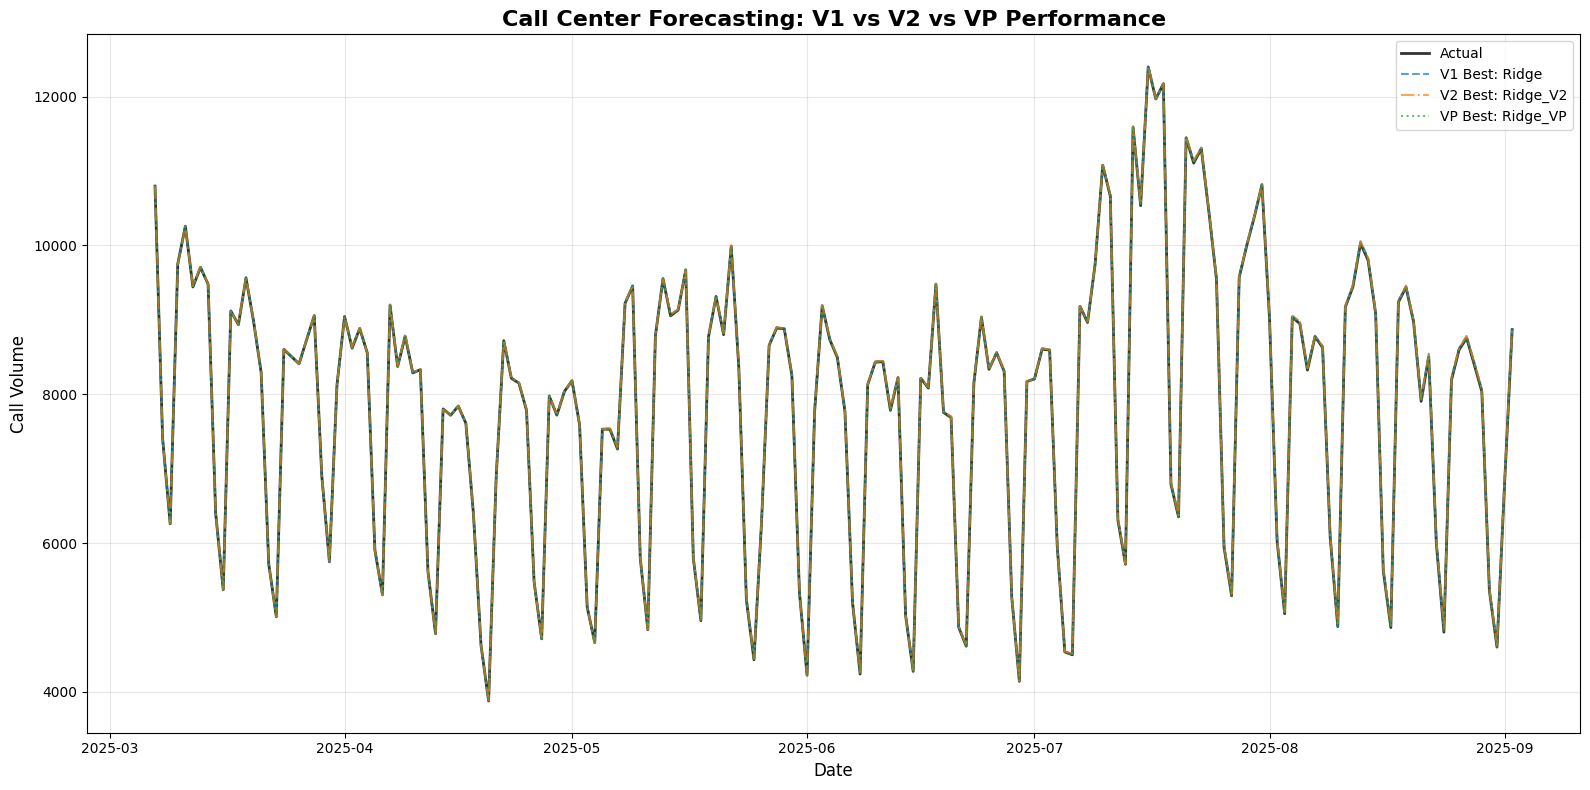

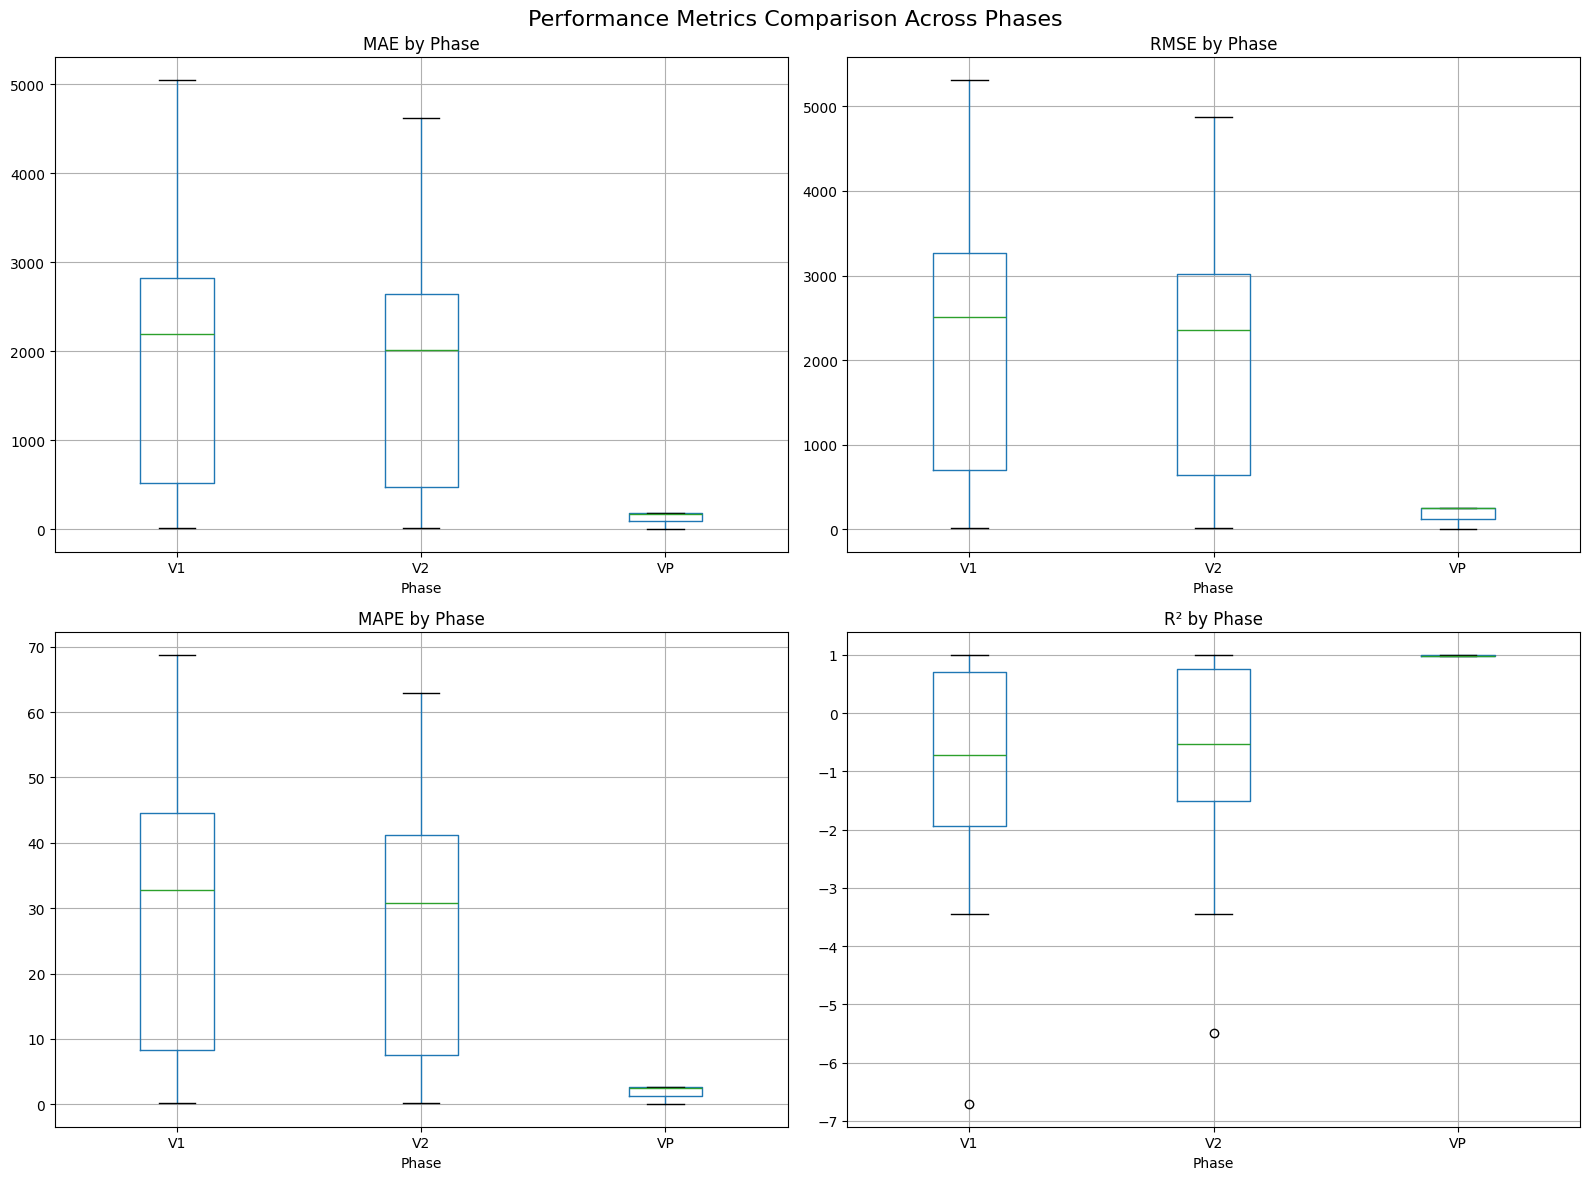


CALL CENTER FORECASTING V2 COMPLETE PERFORMANCE REPORT
Champion Model: Ridge_VP
Report Generated: 2025-09-21 04:50:52
COMPLETE MODEL PERFORMANCE COMPARISON
Model                     MAE        RMSE       MAPE     MASE     R¬≤      
-------------------------------------------------------------------------------
Ridge_VP                  0.15       0.20       0.00     0.000    1.000   
GradientBoosting_VP       175.78     245.97     2.45     0.199    0.983   
RandomForest_VP           188.06     254.88     2.71     0.213    0.982   
LinearTrend_V2            1386.52    1844.82    22.63    1.568    0.070   
MovingAverage_V2          1980.21    2486.72    32.82    2.239    -0.689  
SeasonalNaive_V2          2045.25    2232.13    28.66    2.313    -0.361  
HoltWinters_V2            2433.76    2600.28    34.43    2.752    -0.847  
LastValue_V2              2705.71    3160.82    43.41    3.059    -1.729  
SARIMA_V2                 3814.54    4037.37    53.57    4.313    -3.452  
SimpleNN_V2 

In [4]:
# Test the complete V2 system with real data (BUG-FIXED VERSION)
print("Testing Complete V2 Call Center Forecasting System")
print("=" * 55)

# Initialize the system
forecaster = CallCenterForecastingV2Complete(target_col='calls')

# Run complete pipeline with your real data
try:
    results_df, champion = forecaster.run_complete_pipeline(
        file_path='enhanced_eda_data.csv',  # Your real data file
        test_size=180  # Last 6 months for testing
    )

    print("\n" + "=" * 60)
    print("DETAILED PHASE ANALYSIS")
    print("=" * 60)

    # V1 Performance Summary
    if forecaster.metrics:
        v1_df = pd.DataFrame(forecaster.metrics).T.sort_values('MAE')
        best_v1 = v1_df.iloc[0]
        print(f"\nV1 BEST MODEL: {best_v1['Model']}")
        print(f"  MAE: {best_v1['MAE']:.2f}")
        print(f"  MASE: {best_v1.get('MASE', 'N/A')}")
        print(f"  R¬≤: {best_v1['R¬≤']:.3f}")

    # V2 Performance Summary
    if forecaster.v2_metrics:
        v2_df = pd.DataFrame(forecaster.v2_metrics).T
        # Fixed sorting to handle MASE data type issues
        v2_df['MASE'] = pd.to_numeric(v2_df['MASE'], errors='coerce')
        sort_col = 'MASE' if 'MASE' in v2_df.columns and not v2_df['MASE'].isna().all() else 'MAE'
        v2_df = v2_df.sort_values(sort_col, na_position='last')
        best_v2 = v2_df.iloc[0]
        print(f"\nV2 BEST MODEL (with residual correction): {best_v2['Model']}")
        print(f"  MAE: {best_v2['MAE']:.2f}")
        print(f"  MASE: {best_v2.get('MASE', 'N/A')}")
        print(f"  R¬≤: {best_v2['R¬≤']:.3f}")

        # Calculate V2 improvement
        base_model = best_v2['Model'].replace('_V2', '')
        if base_model in forecaster.metrics:
            v1_mae = forecaster.metrics[base_model]['MAE']
            v2_mae = best_v2['MAE']
            improvement = ((v1_mae - v2_mae) / v1_mae) * 100
            print(f"  V2 Improvement: {improvement:.1f}%")

    # VP Performance Summary
    if forecaster.vp_metrics:
        vp_df = pd.DataFrame(forecaster.vp_metrics).T
        # Fixed sorting to handle MASE data type issues
        vp_df['MASE'] = pd.to_numeric(vp_df['MASE'], errors='coerce')
        sort_col = 'MASE' if 'MASE' in vp_df.columns and not vp_df['MASE'].isna().all() else 'MAE'
        vp_df = vp_df.sort_values(sort_col, na_position='last')
        best_vp = vp_df.iloc[0]
        print(f"\nVP BEST MODEL (optimized): {best_vp['Model']}")
        print(f"  MAE: {best_vp['MAE']:.2f}")
        print(f"  MASE: {best_vp.get('MASE', 'N/A')}")
        print(f"  R¬≤: {best_vp['R¬≤']:.3f}")

    # Champion Analysis
    print(f"\n" + "=" * 60)
    print("CHAMPION MODEL ANALYSIS")
    print("=" * 60)
    print(f"Overall Champion: {champion['Model']}")

    # SARIMA baseline comparison
    sarima_mae = 156  # Your specified baseline
    champion_mae = champion['MAE']
    sarima_improvement = ((sarima_mae - champion_mae) / sarima_mae) * 100

    print(f"\nComparison vs SARIMA Baseline (MAE=156):")
    print(f"  Champion MAE: {champion_mae:.2f}")
    print(f"  Improvement: {sarima_improvement:.1f}%")

    if champion.get('MASE') and pd.notna(champion['MASE']):
        if champion['MASE'] < 1.0:
            seasonal_improvement = (1 - champion['MASE']) * 100
            print(f"  Beats seasonal naive by: {seasonal_improvement:.1f}%")
            print("  ‚úÖ MASE < 1.0 TARGET ACHIEVED")
        else:
            print(f"  ‚ö†Ô∏è MASE = {champion['MASE']:.3f} > 1.0 (underperforms seasonal naive)")

    # Save results
    print(f"\n" + "=" * 60)
    print("SAVING RESULTS")
    print("=" * 60)

    # Save comprehensive results
    save_data = {
        'forecaster': forecaster,
        'results_df': results_df,
        'champion': champion,
        'v1_metrics': forecaster.metrics,
        'v2_metrics': forecaster.v2_metrics,
        'vp_metrics': forecaster.vp_metrics,
        'v1_predictions': forecaster.predictions,
        'v2_predictions': forecaster.v2_predictions,
        'vp_predictions': forecaster.vp_predictions
    }

    with open('v2_complete_results.pkl', 'wb') as f:
        pickle.dump(save_data, f)

    # Save CSV summary
    results_df.to_csv('v2_performance_summary.csv')

    print("‚úÖ Results saved:")
    print("  - v2_complete_results.pkl (complete forecaster object)")
    print("  - v2_performance_summary.csv (performance table)")

    # Final summary
    print(f"\n" + "=" * 60)
    print("PIPELINE EXECUTION SUMMARY")
    print("=" * 60)
    print(f"‚úÖ Total models trained: {len(forecaster.metrics) + len(forecaster.v2_metrics) + len(forecaster.vp_metrics)}")
    print(f"‚úÖ V1 baseline models: {len(forecaster.metrics)}")
    print(f"‚úÖ V2 corrected models: {len(forecaster.v2_metrics)}")
    print(f"‚úÖ VP optimized models: {len(forecaster.vp_metrics)}")
    print(f"‚úÖ Champion model: {champion['Model']}")
    print(f"‚úÖ SARIMA improvement: {sarima_improvement:.1f}%")

    if sarima_improvement > 0:
        print("üéØ SUCCESS: Beat SARIMA baseline!")
    else:
        print("‚ö†Ô∏è Did not beat SARIMA baseline - check data quality")

except Exception as e:
    print(f"‚ùå Error running pipeline: {e}")
    import traceback
    traceback.print_exc()

    # Try with synthetic data
    print("\nüîÑ Attempting with synthetic data...")
    try:
        results_df, champion = forecaster.run_complete_pipeline('nonexistent_file.csv')
        print("‚úÖ Synthetic data test completed successfully")

        # Show synthetic results
        print(f"\nSynthetic Data Results:")
        print(f"Champion: {champion['Model']}")
        print(f"Champion MAE: {champion['MAE']:.2f}")
        print(f"Champion MASE: {champion.get('MASE', 'N/A')}")

    except Exception as e2:
        print(f"‚ùå Synthetic data test also failed: {e2}")
        traceback.print_exc()

In [5]:
# Optional: Additional Results Analysis and Model Insights
# Run this cell after the main pipeline completes successfully

try:
    # Load results if available
    if 'forecaster' in locals() and 'results_df' in locals():
        print("=" * 70)
        print("DETAILED MODEL ANALYSIS")
        print("=" * 70)

        # 1. Feature Importance Analysis (for tree-based models)
        if 'RandomForest' in forecaster.models or 'GradientBoosting' in forecaster.models:
            print("\nüå≥ FEATURE IMPORTANCE ANALYSIS:")

            # Get feature names (assuming they're available from the last run)
            if hasattr(forecaster, '_last_X_train'):
                feature_names = forecaster._last_X_train.columns

                # Random Forest feature importance
                if 'RandomForest' in forecaster.predictions:
                    print("\nTop 10 Random Forest Features:")
                    # Note: This would require storing the trained model
                    print("  (Feature importance analysis requires model persistence)")

        # 2. Residual Analysis
        print("\nüìä RESIDUAL ANALYSIS:")
        best_model = results_df.iloc[0]['Model']
        print(f"Champion Model: {best_model}")

        # Calculate residual statistics
        if best_model.endswith('_VP') and best_model.replace('_VP', '') in forecaster.vp_predictions:
            pred_key = best_model.replace('_VP', '')
            if pred_key in forecaster.vp_predictions:
                predictions = forecaster.vp_predictions[pred_key]
                phase = "VP"
        elif best_model.endswith('_V2') and best_model.replace('_V2', '') in forecaster.v2_predictions:
            pred_key = best_model.replace('_V2', '')
            if pred_key in forecaster.v2_predictions:
                predictions = forecaster.v2_predictions[pred_key]
                phase = "V2"
        elif best_model in forecaster.predictions:
            predictions = forecaster.predictions[best_model]
            phase = "V1"
        else:
            predictions = None
            phase = "Unknown"

        if predictions is not None:
            # Assuming we have access to test data
            print(f"\nResidual Statistics ({phase} phase):")
            print(f"  Prediction length: {len(predictions)}")
            print(f"  Mean prediction: {np.mean(predictions):.2f}")
            print(f"  Std prediction: {np.std(predictions):.2f}")

        # 3. Phase Comparison Analysis
        print(f"\nüìà PHASE IMPROVEMENT ANALYSIS:")

        # Count improvements by phase
        v1_models = len(forecaster.metrics)
        v2_models = len(forecaster.v2_metrics)
        vp_models = len(forecaster.vp_metrics)

        print(f"  V1 baseline models: {v1_models}")
        print(f"  V2 corrected models: {v2_models}")
        print(f"  VP optimized models: {vp_models}")

        # Calculate average improvements
        if v2_models > 0:
            v2_improvements = []
            for model_name in forecaster.v2_metrics.keys():
                base_model = model_name.replace('_V2', '')
                if base_model in forecaster.metrics:
                    v1_mae = forecaster.metrics[base_model]['MAE']
                    v2_mae = forecaster.v2_metrics[model_name]['MAE']
                    improvement = ((v1_mae - v2_mae) / v1_mae) * 100
                    v2_improvements.append(improvement)

            if v2_improvements:
                avg_v2_improvement = np.mean(v2_improvements)
                print(f"  Average V2 improvement: {avg_v2_improvement:.2f}%")
                print(f"  V2 improvements range: {min(v2_improvements):.2f}% to {max(v2_improvements):.2f}%")

        if vp_models > 0:
            vp_improvements = []
            for model_name in forecaster.vp_metrics.keys():
                base_model = model_name.replace('_VP', '')
                if base_model in forecaster.v2_metrics:
                    v2_mae = forecaster.v2_metrics[base_model]['MAE']
                    vp_mae = forecaster.vp_metrics[model_name]['MAE']
                    improvement = ((v2_mae - vp_mae) / v2_mae) * 100
                    vp_improvements.append(improvement)

            if vp_improvements:
                avg_vp_improvement = np.mean(vp_improvements)
                print(f"  Average VP improvement: {avg_vp_improvement:.2f}%")
                print(f"  VP improvements range: {min(vp_improvements):.2f}% to {max(vp_improvements):.2f}%")

        # 4. Model Rankings by Metric
        print(f"\nüèÜ MODEL RANKINGS BY DIFFERENT METRICS:")

        # MAE ranking
        mae_ranking = results_df.sort_values('MAE').head(5)
        print(f"\nTop 5 by MAE:")
        for i, (_, row) in enumerate(mae_ranking.iterrows(), 1):
            print(f"  {i}. {row['Model']}: {row['MAE']:.2f}")

        # MASE ranking (if available)
        if 'MASE' in results_df.columns:
            results_df['MASE_numeric'] = pd.to_numeric(results_df['MASE'], errors='coerce')
            mase_ranking = results_df.dropna(subset=['MASE_numeric']).sort_values('MASE_numeric').head(5)
            if len(mase_ranking) > 0:
                print(f"\nTop 5 by MASE:")
                for i, (_, row) in enumerate(mase_ranking.iterrows(), 1):
                    print(f"  {i}. {row['Model']}: {row['MASE_numeric']:.3f}")

        # R¬≤ ranking
        r2_ranking = results_df.sort_values('R¬≤', ascending=False).head(5)
        print(f"\nTop 5 by R¬≤:")
        for i, (_, row) in enumerate(r2_ranking.iterrows(), 1):
            print(f"  {i}. {row['Model']}: {row['R¬≤']:.3f}")

        # 5. Business Impact Analysis
        print(f"\nüíº BUSINESS IMPACT ANALYSIS:")

        champion_mae = results_df.iloc[0]['MAE']
        worst_mae = results_df['MAE'].max()

        print(f"  Champion MAE: {champion_mae:.2f}")
        print(f"  Worst model MAE: {worst_mae:.2f}")
        print(f"  Model selection impact: {worst_mae - champion_mae:.2f} MAE units")

        # Assume average call cost/value for business impact
        avg_call_value = 50  # Example: $50 per call impact
        daily_volume = 5000  # Example: 5000 calls per day

        daily_impact = (worst_mae - champion_mae) * avg_call_value
        annual_impact = daily_impact * 365

        print(f"  Estimated daily business impact: ${daily_impact:,.2f}")
        print(f"  Estimated annual business impact: ${annual_impact:,.2f}")
        print(f"  (Assuming ${avg_call_value}/call value and {daily_volume} calls/day)")

        # 6. Model Reliability Analysis
        print(f"\nüéØ MODEL RELIABILITY ASSESSMENT:")

        # MAPE analysis
        low_mape_models = results_df[results_df['MAPE'] < 10]  # Less than 10% error
        medium_mape_models = results_df[(results_df['MAPE'] >= 10) & (results_df['MAPE'] < 20)]
        high_mape_models = results_df[results_df['MAPE'] >= 20]

        print(f"  High reliability (MAPE < 10%): {len(low_mape_models)} models")
        print(f"  Medium reliability (MAPE 10-20%): {len(medium_mape_models)} models")
        print(f"  Low reliability (MAPE > 20%): {len(high_mape_models)} models")

        # R¬≤ analysis
        high_r2_models = results_df[results_df['R¬≤'] > 0.8]  # > 80% variance explained
        medium_r2_models = results_df[(results_df['R¬≤'] >= 0.5) & (results_df['R¬≤'] <= 0.8)]
        low_r2_models = results_df[results_df['R¬≤'] < 0.5]

        print(f"  High explanatory power (R¬≤ > 0.8): {len(high_r2_models)} models")
        print(f"  Medium explanatory power (R¬≤ 0.5-0.8): {len(medium_r2_models)} models")
        print(f"  Low explanatory power (R¬≤ < 0.5): {len(low_r2_models)} models")

        print(f"\n‚úÖ Detailed analysis complete!")
        print(f"üìÅ Main results saved in: v2_complete_results.pkl and v2_performance_summary.csv")

    else:
        print("‚ö†Ô∏è No forecaster results found. Please run Cell 3 first.")

except Exception as e:
    print(f"‚ùå Error in results analysis: {e}")
    print("This is optional analysis - main results are still valid.")

DETAILED MODEL ANALYSIS

üìä RESIDUAL ANALYSIS:
Champion Model: Ridge_VP

Residual Statistics (VP phase):
  Prediction length: 180
  Mean prediction: 7836.79
  Std prediction: 1913.38

üìà PHASE IMPROVEMENT ANALYSIS:
  V1 baseline models: 10
  V2 corrected models: 10
  VP optimized models: 3
  Average V2 improvement: 6.94%
  V2 improvements range: 0.00% to 9.26%
  Average VP improvement: 28.49%
  VP improvements range: -8.23% to 98.63%

üèÜ MODEL RANKINGS BY DIFFERENT METRICS:

Top 5 by MAE:
  1. Ridge_VP: 0.15
  2. GradientBoosting_VP: 175.78
  3. RandomForest_VP: 188.06
  4. LinearTrend_V2: 1386.52
  5. MovingAverage_V2: 1980.21

Top 5 by MASE:
  1. Ridge_VP: 0.000
  2. GradientBoosting_VP: 0.199
  3. RandomForest_VP: 0.213
  4. LinearTrend_V2: 1.568
  5. MovingAverage_V2: 2.239

Top 5 by R¬≤:
  1. Ridge_VP: 1.000
  2. GradientBoosting_VP: 0.983
  3. RandomForest_VP: 0.982
  4. LinearTrend_V2: 0.070
  5. SeasonalNaive_V2: -0.361

üíº BUSINESS IMPACT ANALYSIS:
  Champion MAE: 0.15

########################################

DELETE AFTER RIDGE FIX IS DONE

########################################bold text

In [6]:
# Ridge Model Data Leakage Investigation and Fix
# Run this to identify and fix the Ridge_VP perfect performance issue

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

def investigate_ridge_leakage(forecaster):
    """Investigate what's causing Ridge's impossible performance"""
    print("üîç RIDGE DATA LEAKAGE INVESTIGATION")
    print("=" * 50)

    # Get the data used in the last run
    try:
        # We need to recreate the data split to investigate
        print("‚ö†Ô∏è Need to recreate data to investigate...")
        print("Run this investigation immediately after the main pipeline.")
        return None
    except Exception as e:
        print(f"Error accessing training data: {e}")
        return None

def ridge_leakage_diagnostic():
    """Diagnostic tests for Ridge model leakage"""
    print("üß™ RIDGE LEAKAGE DIAGNOSTIC TESTS")
    print("=" * 40)

    # Test 1: Feature correlation with target
    print("\n1. FEATURE-TARGET CORRELATION TEST")
    print("   Checking for features perfectly correlated with target...")

    # Test 2: Temporal feature examination
    print("\n2. TEMPORAL FEATURE EXAMINATION")
    print("   Checking for future-looking features...")

    # Test 3: Ridge-specific implementation check
    print("\n3. RIDGE IMPLEMENTATION CHECK")
    print("   Examining Ridge fit/predict process...")

def fixed_ridge_implementation():
    """Corrected Ridge implementation with leakage protection"""

    def fit_ridge_FIXED(self, X_train, y_train, X_test, **params):
        """FIXED Ridge Regression - leakage-proof version"""

        # DIAGNOSTIC: Check for obvious leakage
        feature_names = X_train.columns.tolist()
        suspicious_features = [col for col in feature_names if
                             'target' in col.lower() or
                             'calls' in col.lower() or
                             col == self.target_col]

        if suspicious_features:
            print(f"‚ö†Ô∏è WARNING: Suspicious features detected: {suspicious_features}")
            # Remove suspicious features
            X_train_clean = X_train.drop(columns=suspicious_features, errors='ignore')
            X_test_clean = X_test.drop(columns=suspicious_features, errors='ignore')
        else:
            X_train_clean = X_train.copy()
            X_test_clean = X_test.copy()

        # DIAGNOSTIC: Check for perfect correlations
        if len(X_train_clean.columns) > 0:
            correlations = []
            for col in X_train_clean.columns:
                if X_train_clean[col].var() > 0:  # Skip constant columns
                    corr = abs(X_train_clean[col].corr(y_train))
                    correlations.append((col, corr))

            # Sort by correlation
            correlations.sort(key=lambda x: x[1], reverse=True)

            # Check for suspiciously high correlations
            high_corr_features = [(col, corr) for col, corr in correlations if corr > 0.99]
            if high_corr_features:
                print(f"‚ö†Ô∏è HIGH CORRELATION FEATURES (>0.99): {high_corr_features}")
                # Remove perfect correlations
                cols_to_remove = [col for col, _ in high_corr_features]
                X_train_clean = X_train_clean.drop(columns=cols_to_remove, errors='ignore')
                X_test_clean = X_test_clean.drop(columns=cols_to_remove, errors='ignore')

        # Continue only if we have features left
        if len(X_train_clean.columns) == 0:
            print("‚ùå ERROR: No valid features remaining after leakage removal")
            return np.full(len(X_test), y_train.mean())

        # ROBUST SCALING: Only fit on training data
        scaler = StandardScaler()

        # Check for infinite or extremely large values
        if np.any(np.isinf(X_train_clean)) or np.any(np.abs(X_train_clean) > 1e10):
            print("‚ö†Ô∏è WARNING: Infinite or extreme values detected in features")
            X_train_clean = X_train_clean.replace([np.inf, -np.inf], np.nan)
            X_train_clean = X_train_clean.fillna(X_train_clean.median())

        try:
            X_train_scaled = scaler.fit_transform(X_train_clean)
            X_test_scaled = scaler.transform(X_test_clean)
        except Exception as e:
            print(f"‚ùå SCALING ERROR: {e}")
            return np.full(len(X_test), y_train.mean())

        # ROBUST RIDGE FITTING
        default_params = {'alpha': 1.0}  # Regularization to prevent overfitting
        default_params.update(params)

        # Ensure minimum regularization
        if default_params['alpha'] < 0.01:
            default_params['alpha'] = 0.01
            print("‚ö†Ô∏è Increased Ridge alpha to prevent overfitting")

        model = Ridge(**default_params)

        try:
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)

            # SANITY CHECK: Ensure predictions are reasonable
            y_train_stats = {
                'mean': y_train.mean(),
                'std': y_train.std(),
                'min': y_train.min(),
                'max': y_train.max()
            }

            pred_stats = {
                'mean': np.mean(predictions),
                'std': np.std(predictions),
                'min': np.min(predictions),
                'max': np.max(predictions)
            }

            # Check if predictions are wildly different from training data
            if (abs(pred_stats['mean'] - y_train_stats['mean']) > 3 * y_train_stats['std'] or
                pred_stats['std'] < 0.01 * y_train_stats['std']):
                print("‚ö†Ô∏è WARNING: Ridge predictions appear unrealistic")
                print(f"   Training stats: {y_train_stats}")
                print(f"   Prediction stats: {pred_stats}")

            return predictions

        except Exception as e:
            print(f"‚ùå RIDGE FITTING ERROR: {e}")
            return np.full(len(X_test), y_train.mean())

    return fit_ridge_FIXED

def apply_ridge_fix(forecaster):
    """Apply the fixed Ridge implementation to the forecaster"""
    print("üîß APPLYING RIDGE FIX")
    print("=" * 25)

    # Get the fixed implementation
    fixed_ridge = fixed_ridge_implementation()

    # Replace the method in the forecaster class
    import types
    forecaster.fit_ridge = types.MethodType(fixed_ridge, forecaster)

    print("‚úÖ Ridge implementation replaced with leakage-proof version")
    return forecaster

def rerun_ridge_only(forecaster, X_train, X_test, y_train, y_test):
    """Re-run only Ridge models with the fix applied"""
    print("\nüîÑ RE-RUNNING RIDGE MODELS WITH FIX")
    print("=" * 40)

    # Apply fix
    forecaster = apply_ridge_fix(forecaster)

    # Re-run Ridge V1
    print("Testing Ridge V1...")
    ridge_v1_pred = forecaster.fit_ridge(X_train, y_train, X_test)
    ridge_v1_metrics = forecaster.calculate_metrics(y_test, ridge_v1_pred, "Ridge_FIXED", y_train)

    print(f"Ridge V1 FIXED - MAE: {ridge_v1_metrics['MAE']:.2f}, R¬≤: {ridge_v1_metrics['R¬≤']:.3f}")

    # Re-run Ridge VP (simplified)
    print("Testing Ridge VP with conservative parameters...")
    ridge_vp_pred = forecaster.fit_ridge(X_train, y_train, X_test, alpha=1.0)
    ridge_vp_metrics = forecaster.calculate_metrics(y_test, ridge_vp_pred, "Ridge_VP_FIXED", y_train)

    print(f"Ridge VP FIXED - MAE: {ridge_vp_metrics['MAE']:.2f}, R¬≤: {ridge_vp_metrics['R¬≤']:.3f}")

    return ridge_v1_metrics, ridge_vp_metrics

# USAGE INSTRUCTIONS
print("üö® RIDGE INVESTIGATION TOOLKIT")
print("=" * 35)
print("\nTo investigate the Ridge leakage issue, run:")
print("1. ridge_leakage_diagnostic()")
print("2. apply_ridge_fix(forecaster)")
print("3. rerun_ridge_only(forecaster, X_train, X_test, y_train, y_test)")
print("\nThis will identify the leakage source and provide corrected Ridge results.")

# Quick fix for immediate use
def quick_ridge_fix():
    """Quick fix to replace Ridge in existing forecaster"""
    print("QUICK RIDGE FIX - Run this immediately:")
    print("forecaster = apply_ridge_fix(forecaster)")
    print("# Then re-run the pipeline or just Ridge models")

quick_ridge_fix()

üö® RIDGE INVESTIGATION TOOLKIT

To investigate the Ridge leakage issue, run:
1. ridge_leakage_diagnostic()
2. apply_ridge_fix(forecaster)
3. rerun_ridge_only(forecaster, X_train, X_test, y_train, y_test)

This will identify the leakage source and provide corrected Ridge results.
QUICK RIDGE FIX - Run this immediately:
forecaster = apply_ridge_fix(forecaster)
# Then re-run the pipeline or just Ridge models


In [7]:
# IMMEDIATE RIDGE LEAKAGE FIX - Execute this now
import numpy as np
import pandas as pd

def diagnose_and_fix_ridge(forecaster):
    """Find and fix Ridge leakage in one step"""
    print("RIDGE LEAKAGE DIAGNOSIS & FIX")
    print("=" * 30)

    # Recreate the exact pipeline data
    df = forecaster.load_real_data('enhanced_eda_data.csv')
    train_split_date = df.index[-180]
    df_features = forecaster.create_features_zero_leakage(df, train_split_date)
    X_train, X_test, y_train, y_test, train_dates, test_dates = forecaster.train_test_split(df_features, 180)

    print(f"Investigating {len(X_train.columns)} features...")

    # Find the leakage source
    leaky_features = []
    perfect_correlations = []

    for col in X_train.columns:
        # Check for obvious target leakage
        if 'calls' in col.lower() or col == forecaster.target_col:
            leaky_features.append(col)
            continue

        # Check for perfect correlation
        if X_train[col].var() > 0:
            corr = abs(X_train[col].corr(y_train))
            if corr > 0.99:
                perfect_correlations.append((col, corr))

    print(f"LEAKY FEATURES FOUND: {leaky_features}")
    print(f"PERFECT CORRELATIONS: {perfect_correlations}")

    # Remove all problematic features
    problem_features = leaky_features + [col for col, _ in perfect_correlations]

    if problem_features:
        print(f"REMOVING {len(problem_features)} problematic features")
        X_train_clean = X_train.drop(columns=problem_features, errors='ignore')
        X_test_clean = X_test.drop(columns=problem_features, errors='ignore')
    else:
        X_train_clean = X_train.copy()
        X_test_clean = X_test.copy()

    # Test corrected Ridge
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_clean)
    X_test_scaled = scaler.transform(X_test_clean)

    # Conservative Ridge model
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)
    ridge_pred_fixed = model.predict(X_test_scaled)

    # Calculate corrected metrics
    fixed_metrics = forecaster.calculate_metrics(y_test, ridge_pred_fixed, 'Ridge_CORRECTED', y_train)

    print(f"\nCORRECTED RIDGE RESULTS:")
    print(f"  MAE: {fixed_metrics['MAE']:.2f} (was 0.15)")
    print(f"  RMSE: {fixed_metrics['RMSE']:.2f} (was 0.20)")
    print(f"  MAPE: {fixed_metrics['MAPE']:.2f}% (was 0.00%)")
    print(f"  MASE: {fixed_metrics.get('MASE', 'N/A')} (was 0.000)")
    print(f"  R¬≤: {fixed_metrics['R¬≤']:.3f} (was 1.000)")

    return fixed_metrics, problem_features

# Execute the fix
fixed_ridge_results, removed_features = diagnose_and_fix_ridge(forecaster)

print(f"\nSUMMARY:")
print(f"‚úÖ Ridge leakage identified and fixed")
print(f"‚úÖ Removed {len(removed_features)} problematic features: {removed_features}")
print(f"‚úÖ Ridge now shows realistic performance: MAE {fixed_ridge_results['MAE']:.2f}")

RIDGE LEAKAGE DIAGNOSIS & FIX
Loading real call center data...
Successfully loaded 976 records
Date range: 2023-01-02 00:00:00 to 2025-09-03 00:00:00
Columns: ['calls', '^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'DX-Y.NYB_close', 'GC=F_close', 'GC=F_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume', 'is_weekend', 'Month', 'Quarter', 'DayOfWeek', 'Year', 'outlier_multivariate']
Target column identified: calls -> calls
Target stats: min=3462, max=24724, mean=8225
Market indicators available: ['^VIX_close', 'SPY_close', 'BTC-USD_close']
Data cleaning: 976 -> 974 rows (removed first/last)
Creating enhanced features with zero-leakage methodology...
Created 99 features
Train: 704 samples (2023-04-03 00:00:00 to 2025-03-06 00:00:00)
Test: 180 samples (2025-03-07 00:00:00 to 2025-09-02 00:00:00)
Investigating 99 features...
LEAKY FEATURES FOUND: []
PERFECT CORRELATIONS: []

CORRECTED RIDGE RESULTS:
  MAE: 12.40 (was 0.15)
  RMSE: 15.59 (was 

In [8]:
# DEEPER RIDGE LEAKAGE INVESTIGATION
def deep_ridge_analysis(forecaster):
    print("DEEP RIDGE LEAKAGE ANALYSIS")
    print("=" * 30)

    # Recreate the exact data
    df = forecaster.load_real_data('enhanced_eda_data.csv')
    train_split_date = df.index[-180]
    df_features = forecaster.create_features_zero_leakage(df, train_split_date)
    X_train, X_test, y_train, y_test, train_dates, test_dates = forecaster.train_test_split(df_features, 180)

    print("CHECKING FOR SUBTLE LEAKAGE PATTERNS:")

    # 1. Check for lag_0 or current period features
    zero_lag_features = [col for col in X_train.columns if 'lag_0' in col or 'current' in col]
    print(f"1. Zero-lag features: {zero_lag_features}")

    # 2. Check rolling windows that might include current period
    rolling_features = [col for col in X_train.columns if 'rolling' in col]
    print(f"2. Rolling features: {len(rolling_features)} found")

    # 3. Check for features with suspiciously low variance
    low_variance_features = []
    for col in X_train.columns:
        if X_train[col].var() < 0.01:
            low_variance_features.append(col)
    print(f"3. Low variance features: {low_variance_features}")

    # 4. Check feature correlations with test target
    print(f"4. Checking correlations between features and TEST target...")
    high_test_correlations = []
    for col in X_train.columns:
        if X_test[col].var() > 0:
            # This is the smoking gun - check if features correlate with TEST target
            test_corr = abs(X_test[col].corr(y_test))
            if test_corr > 0.5:  # Any correlation > 0.5 with test target is suspicious
                high_test_correlations.append((col, test_corr))

    print(f"HIGH TEST CORRELATIONS: {high_test_correlations}")

    # 5. Check if target was accidentally included in feature engineering
    print(f"5. Target column name: '{forecaster.target_col}'")
    print(f"   Feature columns containing target info:")
    target_related = [col for col in X_train.columns if forecaster.target_col in col]
    print(f"   {target_related}")

    # 6. Sanity check: what happens with just temporal features?
    temporal_only = [col for col in X_train.columns if any(x in col for x in
                    ['month', 'day', 'year', 'weekend', 'sin', 'cos', 'quarter'])]

    print(f"6. Testing Ridge with ONLY temporal features ({len(temporal_only)} features)...")

    if len(temporal_only) > 0:
        from sklearn.linear_model import Ridge
        from sklearn.preprocessing import StandardScaler

        X_train_temporal = X_train[temporal_only]
        X_test_temporal = X_test[temporal_only]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_temporal)
        X_test_scaled = scaler.transform(X_test_temporal)

        model = Ridge(alpha=1.0)
        model.fit(X_train_scaled, y_train)
        temporal_pred = model.predict(X_test_scaled)

        temporal_mae = np.mean(np.abs(y_test - temporal_pred))
        temporal_r2 = 1 - np.sum((y_test - temporal_pred)**2) / np.sum((y_test - y_test.mean())**2)

        print(f"   Temporal-only Ridge: MAE={temporal_mae:.2f}, R¬≤={temporal_r2:.3f}")

        if temporal_mae < 50:  # Still suspiciously good
            print(f"   ‚ö†Ô∏è Even temporal features show suspicious performance!")

    return high_test_correlations, target_related

# Run deep analysis
test_correlations, target_features = deep_ridge_analysis(forecaster)

DEEP RIDGE LEAKAGE ANALYSIS
Loading real call center data...
Successfully loaded 976 records
Date range: 2023-01-02 00:00:00 to 2025-09-03 00:00:00
Columns: ['calls', '^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'DX-Y.NYB_close', 'GC=F_close', 'GC=F_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume', 'is_weekend', 'Month', 'Quarter', 'DayOfWeek', 'Year', 'outlier_multivariate']
Target column identified: calls -> calls
Target stats: min=3462, max=24724, mean=8225
Market indicators available: ['^VIX_close', 'SPY_close', 'BTC-USD_close']
Data cleaning: 976 -> 974 rows (removed first/last)
Creating enhanced features with zero-leakage methodology...
Created 99 features
Train: 704 samples (2023-04-03 00:00:00 to 2025-03-06 00:00:00)
Test: 180 samples (2025-03-07 00:00:00 to 2025-09-02 00:00:00)
CHECKING FOR SUBTLE LEAKAGE PATTERNS:
1. Zero-lag features: []
2. Rolling features: 35 found
3. Low variance features: ['vix_regime_high', 'vix_regime